In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
df = pd.read_excel("Standarded_Data_Format.xlsx")

In [3]:
df_data = df.copy()
df_data.head(1)

,ft,bt,km,transmission,ownerno,oem,model,modelyear,centralvariantid,variantname,price,registration_year,insurance_validity,seats,rto,engine_displacement,year_of_manufacture,power_steering,power_windows_front,air_conditioner,heater,adjustable_head_lights,centeral_locking,child_safety_locks,power_windows_rear,remote_trunk_opener,remote_fuel_lid_opener,low_fuel_warning_light,accessory_power_outlet,rear_seat_headrest,glove_compartment,day_night_rear_view_mirror,passenger_side_rear_view_mirror,halogen_headlamps,rear_seat_belts,door_ajar_warning,anti_lock_braking_system,multifunction_steering_wheel,navigation_system,engine_start_stop_button,gear_shift_indicator,adjustable_steering,outside_temperature_display,rear_window_defogger,power_door_locks,driver_air_bag,passenger_air_bag,seat_belt_warning,engine_check_warning,crash_sensor,rear_camera,speed_sensing_auto_door_lock,pretensioners_and_force_limiter_seatbelts,impact_sensing_auto_door_lock,radio,integrated2din_audio,usb_auxiliary_input,bluetooth,touch_screen,driving_experience_control_eco,rear_reading_lamp,rear_acvents,air_quality_control,height_adjustable_front_seat_belts,cruise_control,voice_control,leather_seats,battery_saver,anti_theft_alarm,hill_assist,brake_assist,rain_sensing_wiper,adjustable_headrest,ledheadlights,cornering_headlamps,side_air_bag_front,side_air_bag_rear,tyre_pressure_monitor,clutch_lock,anti_pinch_power_windows,knee_airbags,wireless_phone_charging,projector_headlamps,speed_alert,rear_entertainment_system,ventilated_seats,view360camera,steering_mounted_tripmeter,hill_descent_control,roof_carrier,mileage,torque,engine_type,no_of_cylinder,values_per_cylinder,turbo_charger,super_charger,length,width,height,wheel_base,kerb_weight,gross_weight,drive_type,steering_type,turning_radius,top_speed,no_door_numbers,cargo_volumn,alloy_wheel_size,ground_clearance_unladen,city,stability_features,blind_spot_assistance,indicators,Adjustable_rear_view_mirror,fog_lamps,automatic_lamps,meters,car_roof,speakers,antenna,player,smartphone_integration,impact_beams,gears,max_power_bhp,front_brake_type_group,rear_brake_type_group,tyre_type_group,color_group
0,petrol,hatchback,120000,manual,3,maruti,maruti celerio,2015,3979,vxi,400000.0,2015,third party,5,ka51,998,2015,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,23.1,90.0,k10b engine,3,4,no,no,3715,1635,1565,2425,835.0,1197.110232,fwd,power,4.7,150.0,5,235,14,165,bangalore,False,False,False,True,False,False,True,False,False,True,False,False,True,5,67.04,disc,drum,radial tubeless,White


In [4]:
for i in df_data.columns:
    print(f"{i}:unique count -> {df_data[i].nunique()}, <> unique percentage -> {(df_data[i].nunique()/len(df_data))*100}% <>, null value percentage -> {(df_data[i].isnull().sum()/len(df_data))*100}%, Data types -> {df_data[i].dtypes}")
    print("-------------------------------------------------------------------------------------")

ft:unique count -> 4, <> unique percentage -> 0.055263885051119094% <>, null value percentage -> 0.0%, Data types -> object
-------------------------------------------------------------------------------------
bt:unique count -> 9, <> unique percentage -> 0.12434374136501797% <>, null value percentage -> 0.0%, Data types -> object
-------------------------------------------------------------------------------------
km:unique count -> 3579, <> unique percentage -> 49.44736114948881% <>, null value percentage -> 0.0%, Data types -> int64
-------------------------------------------------------------------------------------
transmission:unique count -> 2, <> unique percentage -> 0.027631942525559547% <>, null value percentage -> 0.0%, Data types -> object
-------------------------------------------------------------------------------------
ownerno:unique count -> 5, <> unique percentage -> 0.06907985631389886% <>, null value percentage -> 0.0%, Data types -> int64
-------------------------

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7238 entries, 0 to 7237
Columns: 131 entries, ft to color_group
dtypes: bool(86), float64(8), int64(19), object(18)
memory usage: 3.1+ MB


In [6]:
# Remove outliers in the numerical columns using z-score
# Function to remove outliers using Z-score
def remove_outliers_zscore(df, columns, z_thresh=3):
        for column in columns:
        # Calculate Z-scores
            z_scores = stats.zscore(df[column])
        
        # Filter out the outliers
            df = df[(abs(z_scores) < z_thresh)]
    
        return df

# Apply the function to the DataFrame
columns_to_check = ['km', 'modelyear', 'registration_year','seats',  'year_of_manufacture', 'length', 'width', 'height', 'wheel_base','no_door_numbers', 'cargo_volumn', 'alloy_wheel_size','ground_clearance_unladen', 'gears']
df_data = remove_outliers_zscore(df_data, columns_to_check)
df_data.shape

(6599, 131)

In [7]:
df_data['ft'] = df_data['ft'].replace('cng','gas').replace('lpg','gas')

for i in ['super_charger','turbo_charger']:
    df_data[i] = df_data[i].replace('yes',True).replace('no',False)

for i in ['front_brake_type_group','rear_brake_type_group']:
    df_data[i] = df_data[i].replace('drum',0).replace('disc',1)

In [8]:
# Removing duplicate RTO codes from the dictionary
rto_state = {
    "ka51": "karnataka", "ka05": "karnataka", "ka03": "karnataka", "ka53": "karnataka", "ka04": "karnataka", 
    "ka41": "karnataka", "ka02": "karnataka", "ka01": "karnataka", "ka47": "karnataka", "ka19": "karnataka", 
    "ka09": "karnataka", "ka50": "karnataka", "ka66": "karnataka", "ka20": "karnataka", "ka52": "karnataka", 
    "ka25": "karnataka", "ka13": "karnataka", "ka55": "karnataka", "ka07": "karnataka", "ka17": "karnataka", 
    "ka06": "karnataka", "ka14": "karnataka", "ka35": "karnataka", "ka21": "karnataka", "ka42": "karnataka", 
    "ka32": "karnataka", "ka63": "karnataka", "ka36": "karnataka", "ka40": "karnataka", "ka27": "karnataka", 
    "ka34": "karnataka", "ka45": "karnataka", "ka59": "karnataka", "ka18": "karnataka", "ka68": "karnataka", 
    "ka16": "karnataka", "ka22": "karnataka", "ka33": "karnataka", "ka12": "karnataka", "ka44": "karnataka", 
    
    "tn33": "tamilnadu", "tn14": "tamilnadu", "tn10": "tamilnadu", "tn01": "tamilnadu", "tn24": "tamilnadu", 
    "tn18": "tamilnadu", "tn03": "tamilnadu", "tn04": "tamilnadu", "tn11": "tamilnadu", "tn06": "tamilnadu", 
    "tn05": "tamilnadu", "tn19": "tamilnadu", "tn07": "tamilnadu", "tn22": "tamilnadu", "tn02": "tamilnadu", 
    "tn12": "tamilnadu", "tn63": "tamilnadu", "tn13": "tamilnadu", "tn42": "tamilnadu", "tn91": "tamilnadu", 
    "tn29": "tamilnadu", "tn77": "tamilnadu", "tn23": "tamilnadu", "tn57": "tamilnadu", "tn87": "tamilnadu", 
    "tn49": "tamilnadu", "tn20": "tamilnadu", "tn90": "tamilnadu", "tn47": "tamilnadu", "tn85": "tamilnadu", 
    "tn81": "tamilnadu", "tn15": "tamilnadu", "tn21": "tamilnadu", "tn32": "tamilnadu", "tn83": "tamilnadu", 
    "tn64": "tamilnadu", "tn73": "tamilnadu", "tn45": "tamilnadu", "tn84": "tamilnadu", "tn69": "tamilnadu", 
    "tn97": "tamilnadu", "tn08": "tamilnadu", "tn30": "tamilnadu", "tn72": "tamilnadu", "tn58": "tamilnadu", 
    "tn31": "tamilnadu", "tn82": "tamilnadu", "tn75": "tamilnadu", "tn70": "tamilnadu", "tn48": "tamilnadu", 
    "tn16": "tamilnadu", "tn38": "tamilnadu", "tn54": "tamilnadu", "tn95": "tamilnadu", "tn37": "tamilnadu", 
    "tn59": "tamilnadu", "tn99": "tamilnadu", "tn88": "tamilnadu", "tn51": "tamilnadu", "tn96": "tamilnadu", 
    "tn74": "tamilnadu", "tn66": "tamilnadu", "tn55": "tamilnadu", "tn65": "tamilnadu", 
    
    "dl14": "delhi", "dl8c": "delhi", "dl03": "delhi", "dl4c": "delhi", "dl9x": "delhi", 
    "dl10": "delhi", "dl04": "delhi", "dl15": "delhi", "dl2c": "delhi", "dl26": "delhi", 
    "dl12": "delhi", "dl07": "delhi", "dl13": "delhi", "dl05": "delhi", "dl08": "delhi", 
    "dl09": "delhi", "dl16": "delhi", "dl01": "delhi", "dl02": "delhi", "dl5p": "delhi", 
    
    "wb38": "west bengal", "wb26": "west bengal", "wb08": "west bengal", "wb02": "west bengal", 
    "wb06": "west bengal", "wb18": "west bengal", "wb24": "west bengal", "wb22": "west bengal", 
    "wb20": "west bengal", "wb12": "west bengal", "wb10": "west bengal", "wb96": "west bengal", 
    "wb36": "west bengal", "wb42": "west bengal", "wb16": "west bengal", "wb40": "west bengal", 
    "wb74": "west bengal", "wb44": "west bengal", "wb52": "west bengal", "wb50": "west bengal", 
    "wb94": "west bengal", "wb34": "west bengal", "wb90": "west bengal", "wb68": "west bengal", 
    "wb60": "west bengal", "wb66": "west bengal", "wb03": "west bengal", "wb92": "west bengal", 
    "wb58": "west bengal", "wb72": "west bengal", 
    
    "kl07": "kerala", "kl24": "kerala", "kl60": "kerala", "kl22": "kerala", "kl58": "kerala", 
    
    "up32": "up", "up70": "up", "up14": "up", "up63": "up", "up16": "up", 
    "up15": "up", "up21": "up", "up80": "up", "up37": "up", "up72": "up", 
    "up64": "up", "up82": "up", "up33": "up", "up36": "up", "up53": "up", 
    
    "hr26": "haryana", "hr51": "haryana", "hr13": "haryana", "hr72": "haryana", "hr98": "haryana", 
    "hr36": "haryana", "hr01": "haryana", "hr06": "haryana", "hr87": "haryana", "hr70": "haryana", 
    "hr05": "haryana", "hr12": "haryana", "hr52": "haryana", "hr19": "haryana", "hr03": "haryana", 
    "hr30": "haryana", "hr08": "haryana", "hr81": "haryana", "hr10": "haryana", "hr24": "haryana", 
    "hr42": "haryana", "hr43": "haryana", "hr16": "haryana", "hr89": "haryana", "hr29": "haryana", 
    
    "mh48": "maharashtra", "mh04": "maharashtra", "mh43": "maharashtra", "mh02": "maharashtra", 
    "mh14": "maharashtra", "mh46": "maharashtra", "mh05": "maharashtra", "mh49": "maharashtra", 
    "mh18": "maharashtra", 
    
    "ap39": "andhra pradesh", "ap28": "andhra pradesh", "ap16": "andhra pradesh", "ap10": "andhra pradesh", 
    "ap11": "andhra pradesh", "ap13": "andhra pradesh", "ap22": "andhra pradesh", "ap07": "andhra pradesh", 
    "ap09": "andhra pradesh", "ap29": "andhra pradesh", "ap20": "andhra pradesh", "ap36": "andhra pradesh", 
    "ap31": "andhra pradesh", "ap23": "andhra pradesh", "ap24": "andhra pradesh", "ap12": "andhra pradesh", 
    "ap25": "andhra pradesh", "ap21": "andhra pradesh", "ap26": "andhra pradesh", "ap02": "andhra pradesh", 
    "ap01": "andhra pradesh", "ap27": "andhra pradesh", 
    
    "rj05": "rajasthan", "rj13": "rajasthan", "rj14": "rajasthan", "rj32": "rajasthan", "rj45": "rajasthan", 
    "rj19": "rajasthan", "rj01": "rajasthan", "rj27": "rajasthan", "rj02": "rajasthan", "rj37": "rajasthan", 
    "rj22": "rajasthan", "rj18": "rajasthan", "rj23": "rajasthan", "rj42": "rajasthan", "rj48": "rajasthan", 
    "rj40": "rajasthan", "rj07": "rajasthan", "rj21": "rajasthan", "rj51": "rajasthan", "rj10": "rajasthan", 
    "rj29": "rajasthan", "rj41": "rajasthan", "rj36": "rajasthan", "rj16": "rajasthan", "rj11": "rajasthan", 
    "rj20": "rajasthan", "rj26": "rajasthan", "rj35": "rajasthan", "rj34": "rajasthan", "rj39": "rajasthan", 
    "rj04": "rajasthan", "rj06": "rajasthan", "rj24": "rajasthan", "rj53": "rajasthan", "rj43": "rajasthan", 
    "rj47": "rajasthan", "rj09": "rajasthan", "rj30": "rajasthan", "rj28": "rajasthan", 
    
    "gj06": "gujarat", "gj04": "gujarat", "gj15": "gujarat", "gj10": "gujarat", 
    
    "pb10": "punjab", "pb22": "punjab", "pb65": "punjab", 
    
    "up78": "uttar pradesh", "up64": "uttar pradesh", "up82": "uttar pradesh", "up72": "uttar pradesh", 
    "up33": "uttar pradesh", "up36": "uttar pradesh", "up53": "uttar pradesh", 
    
    "br3f": "bihar", 
    
    "ts09": "telangana", "ts08": "telangana", "ts04": "telangana", "ts07": "telangana", "ts32": "telangana", 
    "ts15": "telangana", "ts13": "telangana", "ts11": "telangana", "ts28": "telangana", "ts10": "telangana", 
    "ts27": "telangana", "ts16": "telangana", "ts17": "telangana", "ts05": "telangana", "ts23": "telangana", 
    "ts12": "telangana", "ts35": "telangana", "ts33": "telangana", "ts03": "telangana", "ts25": "telangana", 
    "ts06": "telangana", "ts31": "telangana", "ts29": "telangana", "ts19": "telangana", "ts34": "telangana", 
    "ts30": "telangana", "ts36": "telangana", "ts22": "telangana", "ts24": "telangana", "ts01": "telangana", 
    "ts18": "telangana", 
    
    "as01": "assam", "as05": "assam", 
    
    "hp38": "himachal pradesh", "hp12": "himachal pradesh", "hp34": "himachal pradesh", "hp52": "himachal pradesh", 
    "hp93": "himachal pradesh", "hp15": "himachal pradesh", 
    
    "od02": "odisha", "od33": "odisha", 
    
    "cg04": "chhattisgarh", 
    
    "tt07": "tripura", "tt02": "tripura", 
    
    "mp20": "manipur", "mp09": "manipur", "mp04": "manipur", "mp17": "manipur", "mp33": "manipur", 
    "mp30": "manipur", 
    
    "jk01": "jammu and kashmir", 
    
    "mh02": "meghalaya", 
    
    "ng01": "nagaland", 
    
    "sk01": "sikkim", 
    
    "ga03": "goa", 
    
    "py01": "pondicherry", 
    
    "ap01": "arunachal pradesh", 
    
    "an01": "andaman and nicobar islands", 
    
    "ld01": "lakshadweep"
}


# Mapping the RTO codes to their corresponding states in the DataFrame
df_data["rto_state"] = df_data['rto'].map(rto_state)

# Dropping the 'rto' column
df_data.drop(['rto','variantname'], axis=1, inplace=True)

In [9]:
df_data["rto_state"] = df_data["rto_state"].replace(np.nan,'other')
df_data["rto_state"].unique()

array(['karnataka', 'odisha', 'haryana', 'west bengal', 'other', 'kerala',
       'tamilnadu', 'delhi', 'up', 'andhra pradesh', 'maharashtra',
       'manipur', 'gujarat', 'pondicherry', 'himachal pradesh',
       'telangana', 'meghalaya', 'assam', 'chhattisgarh', 'uttar pradesh',
       'punjab', 'rajasthan', 'goa', 'tripura', 'arunachal pradesh',
       'bihar'], dtype=object)

In [10]:
((df_data.isnull().sum()/len(df_data))*100)

ft                                           0.0
bt                                           0.0
km                                           0.0
transmission                                 0.0
ownerno                                      0.0
oem                                          0.0
model                                        0.0
modelyear                                    0.0
centralvariantid                             0.0
price                                        0.0
registration_year                            0.0
insurance_validity                           0.0
seats                                        0.0
engine_displacement                          0.0
year_of_manufacture                          0.0
power_steering                               0.0
power_windows_front                          0.0
air_conditioner                              0.0
heater                                       0.0
adjustable_head_lights                       0.0
centeral_locking    

In [11]:
for i in df_data.select_dtypes(include='boolean').columns:
    df_data[i] = df_data[i].replace(True,1).replace(False,0)

In [12]:
map_objectToNumeric_dic = {
    col: {val: idx for idx, val in enumerate(df_data[col].unique())}
    for col in df_data.select_dtypes(include='object').columns
}
print(map_objectToNumeric_dic)

{'ft': {'petrol': 0, 'diesel': 1, 'gas': 2}, 'bt': {'hatchback': 0, 'suv': 1, 'sedan': 2, 'muv': 3, 'coupe': 4, 'minivans': 5}, 'transmission': {'manual': 0, 'automatic': 1}, 'oem': {'maruti': 0, 'ford': 1, 'tata': 2, 'hyundai': 3, 'jeep': 4, 'datsun': 5, 'honda': 6, 'bmw': 7, 'renault': 8, 'audi': 9, 'mercedes-benz': 10, 'toyota': 11, 'kia': 12, 'skoda': 13, 'volkswagen': 14, 'mahindra': 15, 'volvo': 16, 'nissan': 17, 'mahindra ssangyong': 18, 'mitsubishi': 19, 'mg': 20, 'chevrolet': 21, 'fiat': 22, 'jaguar': 23, 'mini': 24, 'isuzu': 25, 'lexus': 26, 'land rover': 27, 'porsche': 28}, 'model': {'maruti celerio': 0, 'ford ecosport': 1, 'tata tiago': 2, 'hyundai xcent': 3, 'maruti sx4 s cross': 4, 'jeep compass': 5, 'datsun go': 6, 'maruti ciaz': 7, 'maruti baleno': 8, 'hyundai grand i10': 9, 'honda jazz': 10, 'hyundai i20': 11, 'tata nexon': 12, 'honda city': 13, 'bmw 5 series': 14, 'maruti swift': 15, 'renault duster': 16, 'hyundai santro': 17, 'hyundai santro xing': 18, 'audi a4': 19,

In [13]:
for i in df_data.select_dtypes(include='object').columns:
    df_data[i] = df_data[i].map(map_objectToNumeric_dic[i])

In [14]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6599 entries, 0 to 7237
Columns: 130 entries, ft to rto_state
dtypes: float64(8), int64(122)
memory usage: 6.6 MB


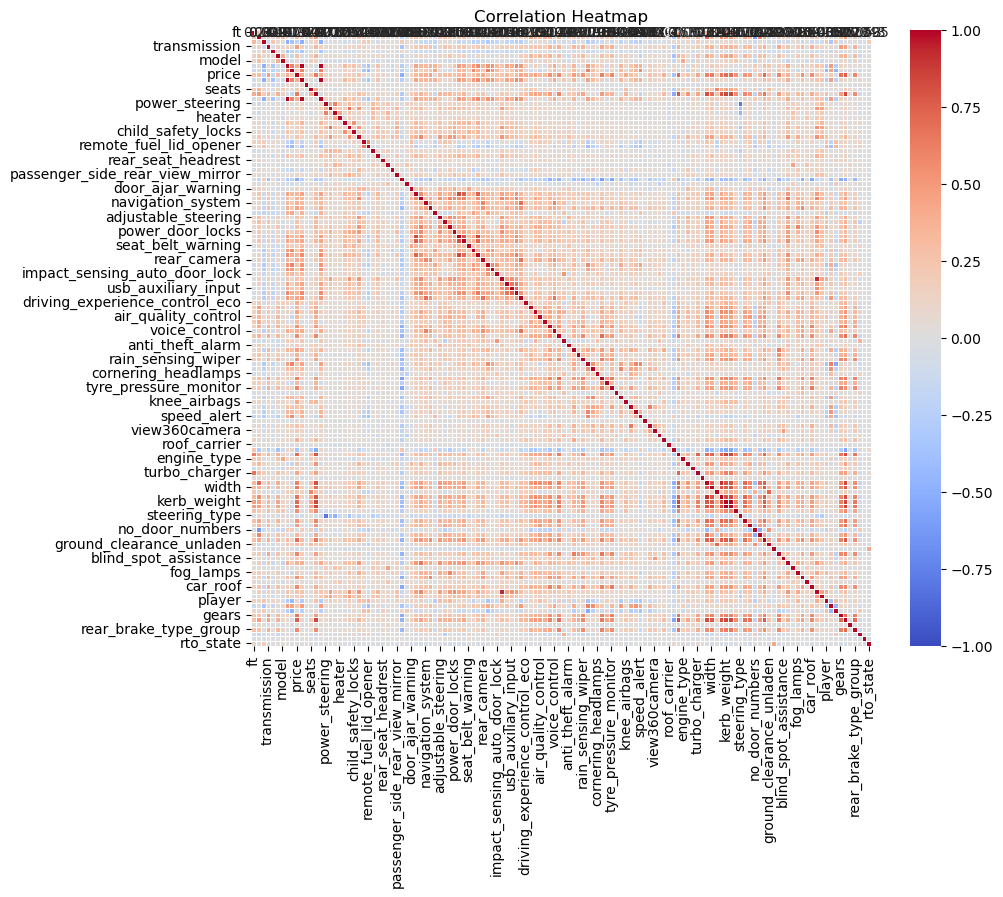

Correlation with 'price':
ft                                           0.235052
bt                                           0.305201
km                                          -0.212784
transmission                                 0.474202
ownerno                                     -0.153633
oem                                          0.293997
model                                        0.100709
modelyear                                    0.393694
centralvariantid                             0.192920
price                                        1.000000
registration_year                            0.393011
insurance_validity                           0.037286
seats                                        0.229178
engine_displacement                          0.636799
year_of_manufacture                          0.393694
power_steering                               0.073410
power_windows_front                          0.144227
air_conditioner                              0.039308
he

In [15]:
# heatmap for numerical columns
numeric_df = df_data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Extract the correlation with 'price'
correlation_with_price = correlation_matrix['price']

# Print the correlation matrix with 'price'
print("Correlation with 'price':")
print(correlation_with_price)

In [16]:
"""
ft,bt,km,transmission,ownerno,oem,model,modelyear,price,registration_year,seats,engine_displacement,driver_air_bag,passenger_air_bag,rear_camera,rear_acvents,side_air_bag_front,side_air_bag_rear,mileage,drive_type,top_speed,city,stability_features,car_roof,gears,front_brake_type_group,rear_brake_type_group]
"""

columns_of_interest = [
    'ft', 'bt', 'km', 'transmission', 'ownerno', 'oem', 'model', 'modelyear', 'price',
    'registration_year', 'seats', 'engine_displacement', 'driver_air_bag', 'passenger_air_bag',
    'rear_camera', 'mileage', 
    'drive_type', 'city', 'car_roof', 'gears', 
    'front_brake_type_group', 'rear_brake_type_group'
]


print(correlation_with_price[columns_of_interest].values)
len(columns_of_interest)

[ 0.23505178  0.30520068 -0.2127838   0.47420214 -0.15363323  0.29399728
  0.10070941  0.3936936   1.          0.39301088  0.22917771  0.63679904
  0.31880927  0.37517496  0.40569633 -0.35407183  0.53997447 -0.11156453
  0.56364236  0.67715716  0.01941185  0.5854313 ]


22

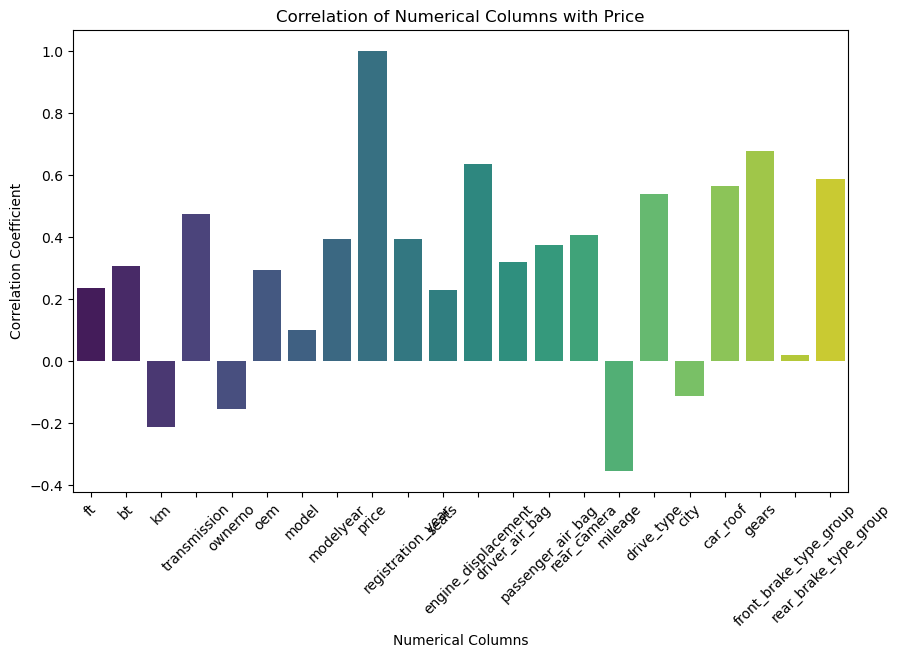

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_price[columns_of_interest].index, y=correlation_with_price[columns_of_interest].values, palette='viridis')
plt.title('Correlation of Numerical Columns with Price')
plt.xlabel('Numerical Columns')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

In [18]:
df_data = df_data[columns_of_interest]
df_data.head(1)

,ft,bt,km,transmission,ownerno,oem,model,modelyear,price,registration_year,seats,engine_displacement,driver_air_bag,passenger_air_bag,rear_camera,mileage,drive_type,city,car_roof,gears,front_brake_type_group,rear_brake_type_group
0,0,0,120000,0,3,0,0,2015,400000.0,2015,5,998,0,0,0,23.1,0,0,0,5,1,0


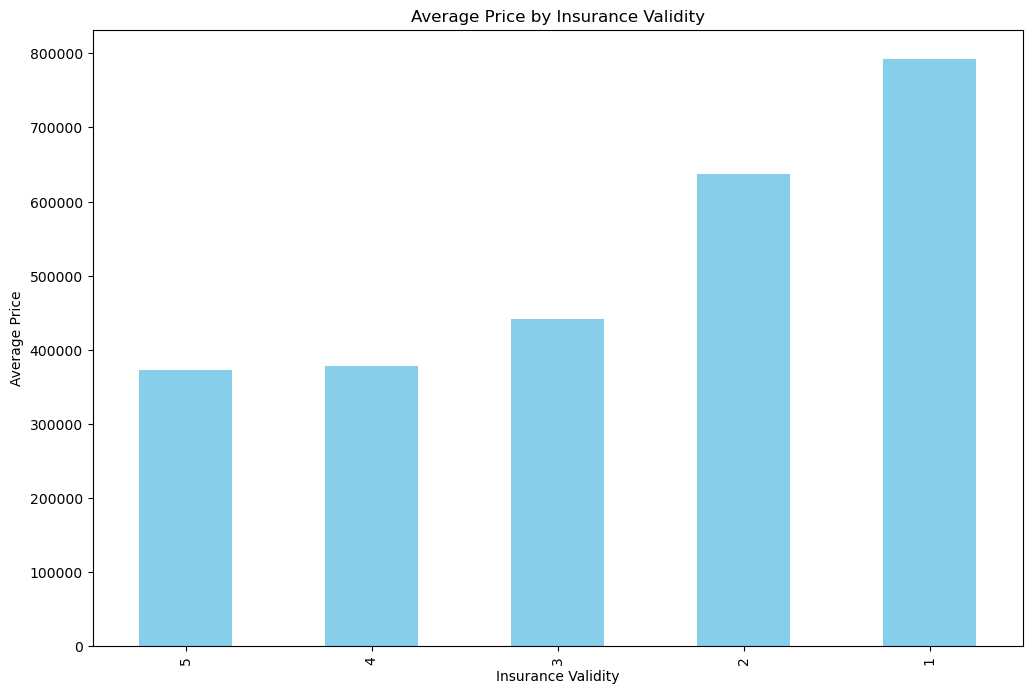

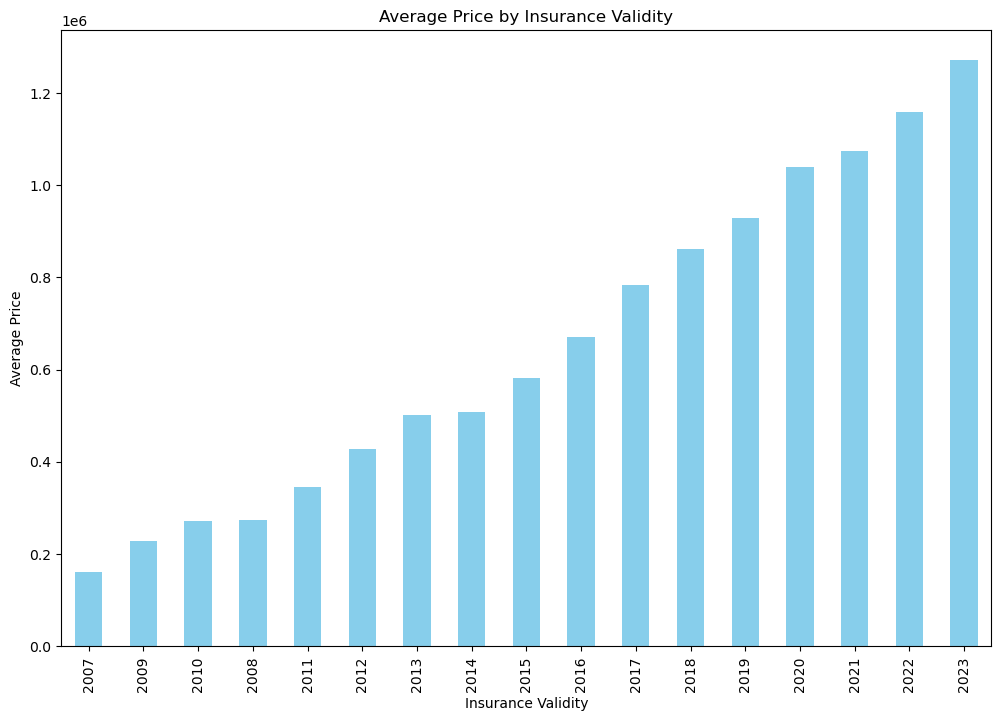

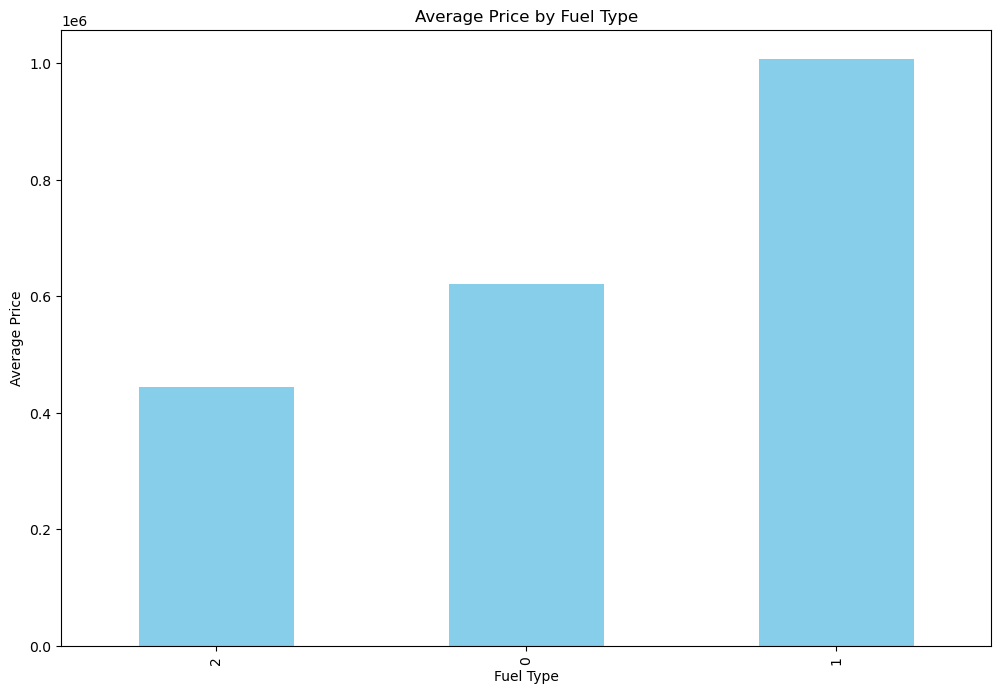

In [19]:
plt.figure(figsize=(12, 8))
average_prices = df_data.groupby('ownerno')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title('Average Price by Insurance Validity')
plt.xlabel('Insurance Validity')
plt.ylabel('Average Price')
plt.show()

plt.figure(figsize=(12, 8))
average_prices = df_data.groupby('registration_year')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title('Average Price by Insurance Validity')
plt.xlabel('Insurance Validity')
plt.ylabel('Average Price')
plt.show()

plt.figure(figsize=(12, 8))
average_prices = df_data.groupby('ft')['price'].mean().sort_values()
average_prices.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()

In [20]:
df_data.to_excel('all_processed_data.xlsx', index=False)